# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Andi Muchammad Fadel Abista]
- **Email:** [m296b4ky0500@bangkit.academy]
- **ID Dicoding:** [m296b4ky0500]

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh cuaca terhadap jumlah penyewa sepeda?
- apakah tren penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [6]:
df_day = pd.read_csv('/datalab/bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/datalab/bike-sharing-dataset/hour.csv')


**Insight:**
- the data consist of 2 files, day.csv and hour.csv
- day.csv contains daily data, and hour.csv contains hourly data.

### Assessing Data

In [7]:
print(df_day.head())
print(df_day.info())
print(df_day.describe())

print(df_hour.head())
print(df_hour.info())
print(df_hour.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.


 **Insight df_day:**
 - The day.csv dataset has 731 rows and 16 columns.
 - The dataset includes information about the date, season, holiday, workingday, weather, temperature, feeling temperature, humidity, windspeed, casual users, registered users, and total users.
 - Some columns have a data type of int64 (integer) and others have float64 (float).
 - The average number of total users is around 4500 with a minimum of 22 and a maximum of 8714.


 **Insight df_hour:**
 - The hour.csv dataset has 17379 rows and 17 columns.
 - The dataset provides detailed hourly information on bike rentals, including date, time, season, holiday, workingday, weather conditions, temperature, feeling temperature, humidity, windspeed, casual users, registered users, and total count.
 - Similar to day.csv, it has integer and float data types.
 - The average number of total users is around 190 with a minimum of 1 and a maximum of 977.

### Cleaning Data

In [11]:
# Load the data into a pandas DataFrame
df_day = pd.read_csv('/datalab/bike-sharing-dataset/day.csv')
df_hour = pd.read_csv('/datalab/bike-sharing-dataset/hour.csv')

# Remove rows with missing values from df_day
df_day = df_day.dropna()

# Remove duplicate rows from df_day
df_day = df_day.drop_duplicates()

# Save the cleaned data to a new CSV file
df_day.to_csv('cleaned_data_day.csv', index=False)

# Remove rows with missing values from df_hour
df_hour = df_hour.dropna()

# Remove duplicate rows from df_hour
df_hour = df_hour.drop_duplicates()

# Save the cleaned data to a new CSV file
df_hour.to_csv('cleaned_data_hour.csv', index=False)

**Insight:**
- The code now cleans both df_day and df_hour by removing missing values and duplicate rows
- the cleaned dataframes are saved as 'cleaned_data_day.csv' and 'cleaned_data_hour.csv'
- since the original datasets dont seem to have missing values or duplicates, the cleaning process might not be a visible impact.


## Exploratory Data Analysis (EDA)

### Explore ...

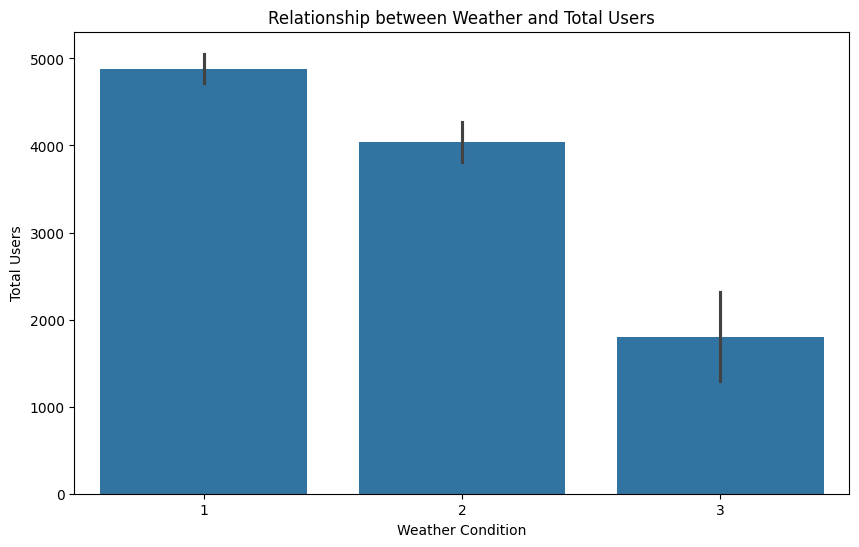

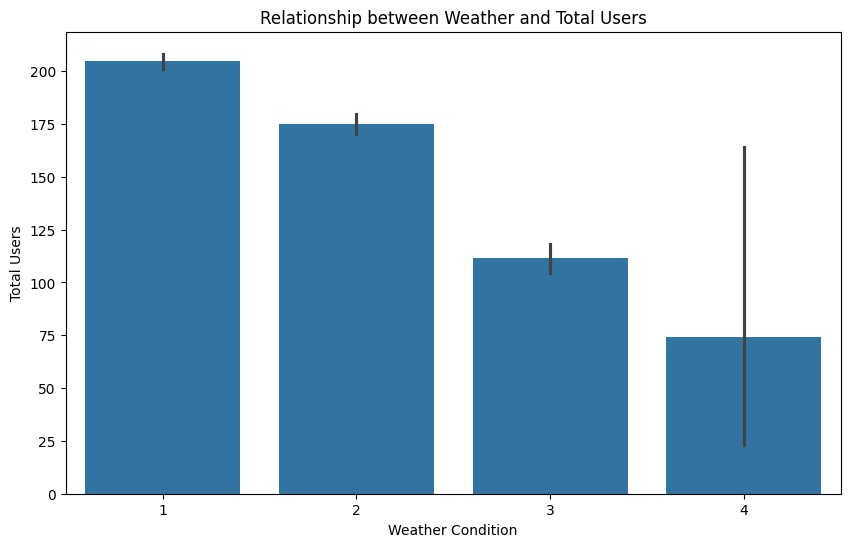

Correlation between temperature and total users: 0.6274940090334918
Correlation between temperature and total users: 0.4047722757786588


In [12]:
#relationship between weather and total users (df_day)
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df_day)
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.title('Relationship between Weather and Total Users')
plt.show()

#relatinship between weather and total users (df_hour)
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df_hour)
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.title('Relationship between Weather and Total Users')
plt.show()

#calculating the correlation between temperature and total users (df_day)
correlation = df_day['temp'].corr(df_day['cnt'])
print('Correlation between temperature and total users:', correlation)

#calculating the correlation between temperature and total users (df_hour)
correlation = df_hour['temp'].corr(df_hour['cnt'])
print('Correlation between temperature and total users:', correlation)

**Insight:**
- Weather Condition heavily influence the number of users. the bar plots clearly show that better weather conditions are associated with significantly higer bike rentals. As weather conditions worsen, the number of user drops drastically
- Temperature has a moderate positive correlation with total users

**this can be valuable for bike-sharing businesses**
- demand forecasting, understanding the impact of weather on bike rentals
- targeted marketing, companies could tailor their marketing campaigns based on weather forecasts
- dynamic pricing, consider adjusting rent prices based on real-time weather conditions and demand.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh cuaca terhadap jumlah penyewa sepeda?

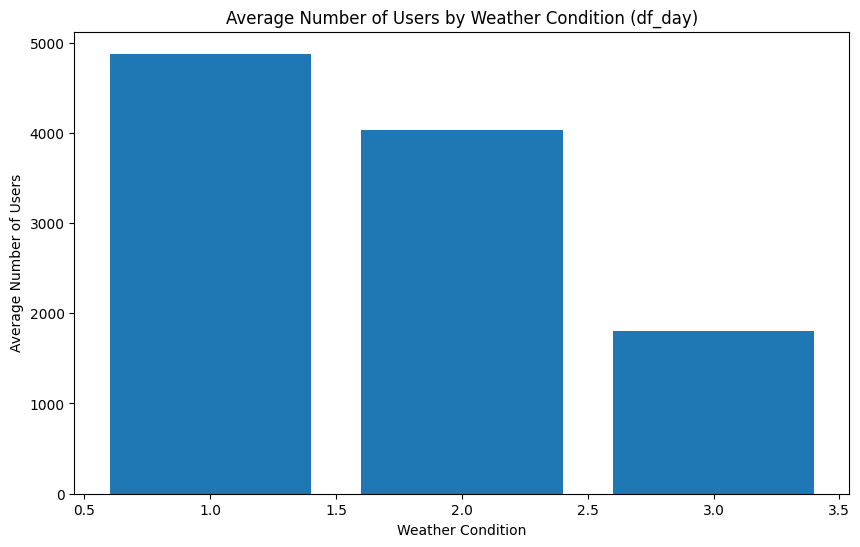

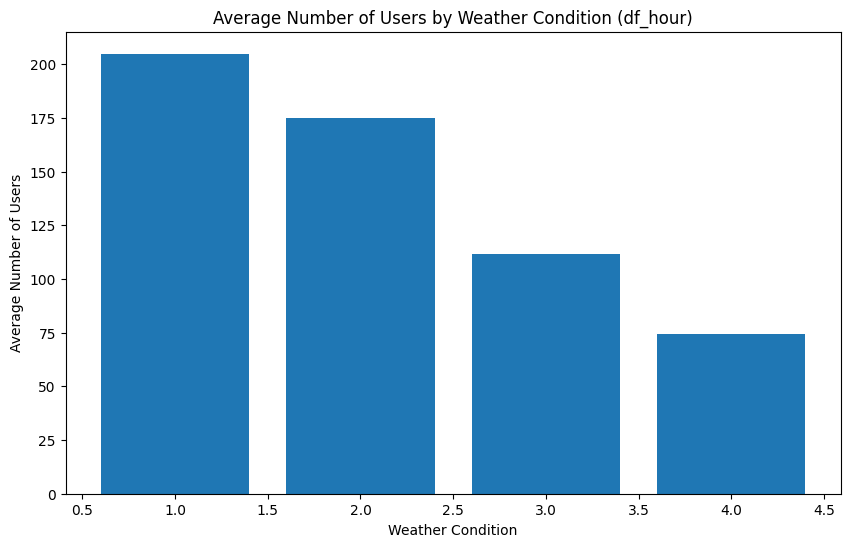

In [14]:
# Load the cleaned datasets
df_day = pd.read_csv('cleaned_data_day.csv')
df_hour = pd.read_csv('cleaned_data_hour.csv')

# Group data by weather condition and calculate the average number of users
weather_effect_day = df_day.groupby('weathersit')['cnt'].mean()
weather_effect_hour = df_hour.groupby('weathersit')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weather_effect_day.index, weather_effect_day.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_day)')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weather_effect_hour.index, weather_effect_hour.values)
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Weather Condition (df_hour)')
plt.show()

### Pertanyaan 2: apakah tren penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan?

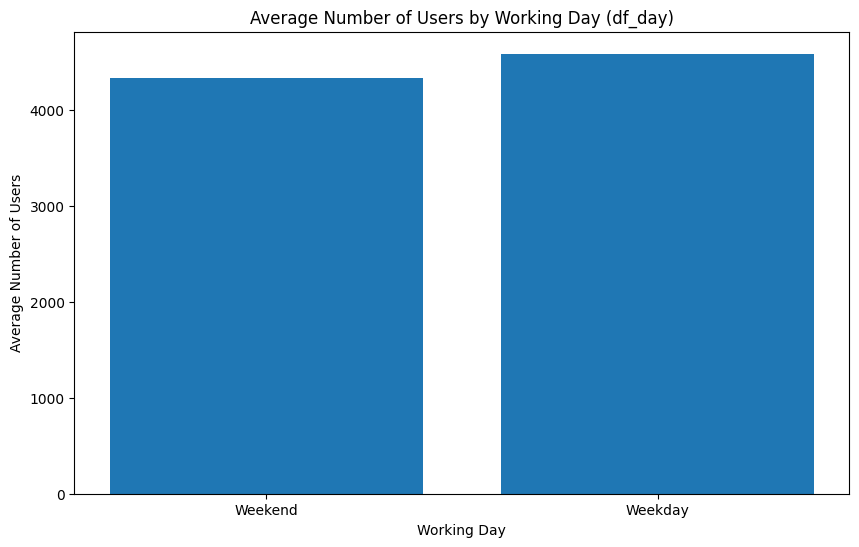

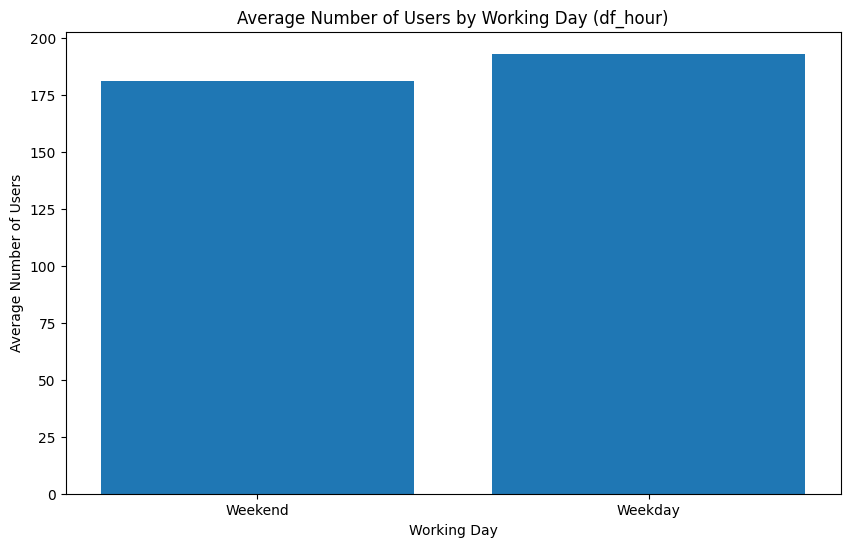

In [15]:
# Group data by workingday and calculate the average number of users
weekday_effect_day = df_day.groupby('workingday')['cnt'].mean()
weekday_effect_hour = df_hour.groupby('workingday')['cnt'].mean()

# Create bar plots for df_day and df_hour
plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_day.index, weekday_effect_day.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_day)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(weekday_effect_hour.index, weekday_effect_hour.values)
plt.xlabel('Working Day')
plt.ylabel('Average Number of Users')
plt.title('Average Number of Users by Working Day (df_hour)')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.show()

**Insight:**
- Both df_day and df_hour show similar trends. There is a significant drop in the average number of users during adverse weather like heavy rain or snow. Weekdays have higher bike usage than weekends, which could indicate that bikes are mainly used for commuting.

## Analisis Lanjutan (Opsional)

## Conclusion

- weather significantly influences bike rental patterns. Clear, sunny weather is associated with the highest average number of users, while adverse conditions like heavy rain or snow drastically reduce ridership
- the average number of bike users is higher on weekdays compared to weekends. this pattern suggest thet bikes are primarily used for commuting and daily activities during the week

Mounted at /content/drive
